In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from plot_params import *
out_stem = 'K562_rep6'
basedir = Path('/home/hsher/scratch/ABC_2rep/')
df = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/DMM/{out_stem}.megaoutputs.tsv', sep = '\t', index_col = 0)
df['name'] = df.index
annot = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/DMM/{out_stem}.cluster_summary.csv', index_col = 0)

raw_data = pd.read_csv(basedir /f'counts/genome/megatables/{out_stem}.tsv.gz', sep = '\t')
raw_data = raw_data.loc[raw_data.sum(axis = 1)>10]
raw_data.index = raw_data.index+1

In [2]:
ground_truth = pd.read_csv('Dan_multiplex1_K562_rep4.Dan_multiplex1_K562_rep6.reproducible_window.csv',
                          index_col = 0)
ground_truth_skipper = pd.read_csv('ABC_K562.skipper_reproducible_window.csv',
                          index_col = 0)
ground_truth_skipper.rename({'DDX3X':'DDX3'}, axis = 1, inplace = True)
ground_truth_skipper.sum().sort_values()

EIF3G         213
ZC3H11A      4722
PUM2         7147
RBFOX2      12206
DDX3        12334
LIN28B      26668
IGF2BP2     28834
SF3B4       44025
FAM120A     50622
PRPF8      102243
dtype: int64

In [3]:
model_alpha = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/DMM/{out_stem}.alpha.tsv', index_col = 0, sep = '\t')
model_alpha.columns = [c.replace('X', 'V') for c in model_alpha.columns]

In [4]:
model_mean = model_alpha.div(model_alpha.sum(axis = 0), axis = 1)

In [5]:
mask = pd.read_csv(basedir / 'mask' / f'{out_stem}.genome_mask.csv', index_col = 0)


In [6]:
fc_bar = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/DMM/{out_stem}.fc_bar.csv',index_col = 0)

In [7]:
bin_annot = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/DMM/{out_stem}.cluster_annotation_binary.csv', index_col = 0)


In [8]:
df['BF_assignment'].isnull().sum()

85458

In [9]:

annot.loc[annot['RBP'].str.contains('SF3B')]

,RBP,RBP_mean,RBP_var,background_mean,fold_change,RI_contribution,# RBP assigned,RI to total read distribution,fraction contain windows needing softmask
V45,"RBFOX2,PRPF8,SF3B4",0.777589,0.012797,0.331386,2.346471,0.0,3,0.516998,0.000000
V27,"PRPF8,SF3B4",0.641364,0.004068,0.206305,3.108820,0.0,2,0.646212,0.000414
V32,"PRPF8,SF3B4",0.667959,0.005877,0.206305,3.237729,0.0,2,0.585449,0.000000
V33,SF3B4,0.216089,0.000816,0.082962,2.604664,0.0,1,0.157433,0.005632
V39,SF3B4,0.676259,0.003337,0.082962,8.151392,0.0,1,1.147354,0.000000


<Axes: ylabel='rowname'>

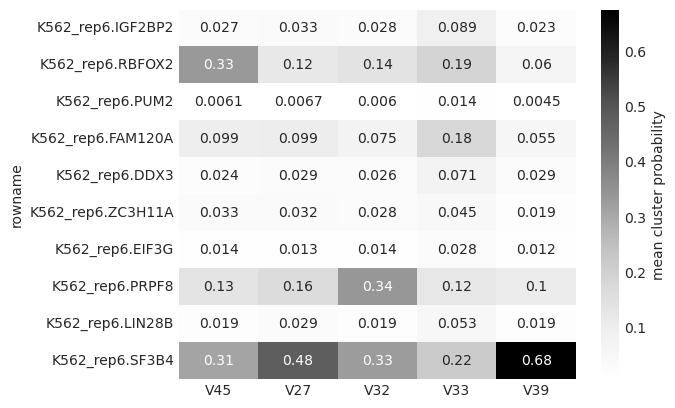

In [10]:
sns.heatmap(model_mean[annot.loc[annot['RBP'].str.contains('SF3B')].index], annot = True, cmap = 'Greys', cbar_kws = {'label':'mean cluster probability'})

/scratch/hsher/33076924.tscc-mgr7.local/ipykernel_32665/4292783448.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


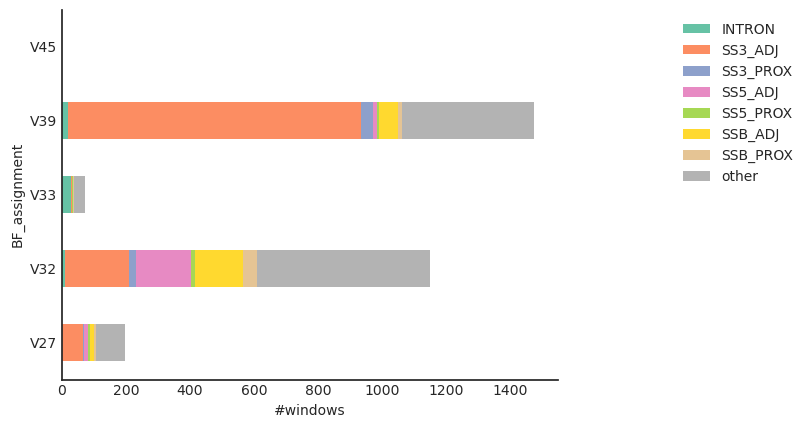

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('Set2')
plt.style.use('seaborn-white')
cnts = df.loc[df['BF_assignment'].isin(annot.loc[annot['RBP'].str.contains('SF3B')].index)].groupby(
    by = 'BF_assignment')['feature_type_top'].value_counts().unstack().fillna(0)
#cnts.index = [annot.loc[clus, 'RBP'] for clus in cnts.index]
other_cols = cnts.columns[~((cnts.columns.str.contains('SS'))|(cnts.columns.str.contains('INTRON')))]
cnts['other']=cnts.loc[:,other_cols].sum(axis = 1)
cnts.drop(other_cols, axis = 1, inplace = True)

cnts.plot.barh(stacked = True)
plt.legend(bbox_to_anchor = (1.5, 1))
plt.xlabel('#windows')
sns.despine()
plt.savefig(figdir/'SF3B_shared.pdf')

In [23]:
df.loc[(df['BF_assignment']=='V15')&(df['feature_type_top'].str.contains('SS')), ['chrom', 'start', 'end', f'{out_stem}.DDX3',
                                                                                   f'{out_stem}.EIF3G',
                                                                                   f'logLR:{out_stem}.DDX3']].sort_values(
    by = f'logLR:{out_stem}.DDX3')

,chrom,start,end,K562_rep6.DDX3,K562_rep6.EIF3G,logLR:K562_rep6.DDX3
Row.names,,,,,,
719331,chr2,171522938,171523038,True,False,2.114176
5070451,chr17,60294382,60294482,True,False,2.285513
3131470,chr9,136831320,136831420,True,False,2.285513
4018285,chr12,116276329,116276429,True,False,2.327165
4866619,chr17,18183465,18183565,True,False,2.461367
2090713,chr6,31752900,31753000,True,False,2.461367
1001472,chr2,189581607,189581707,True,False,2.461367
5277201,chr19,44914771,44914833,True,False,2.485424
3574539,chr11,66348170,66348270,True,False,2.485424


In [13]:
annot.loc[annot['RBP'].str.contains('EIF3G')]

,RBP,RBP_mean,RBP_var,background_mean,fold_change,RI_contribution,# RBP assigned,RI to total read distribution,fraction contain windows needing softmask
V46,"DDX3,EIF3G",0.345226,0.003387,0.074571,4.629462,0.0,2,0.371922,0.002786


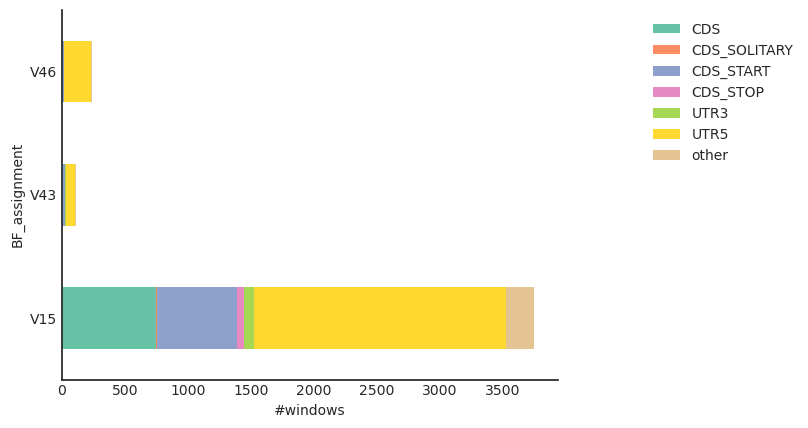

In [14]:
cnts = df.loc[df['BF_assignment'].isin(annot.loc[annot['RBP'].str.contains('DDX3')].index)].groupby(
    by = 'BF_assignment')['feature_type_top'].value_counts().unstack().fillna(0)
#cnts.index = [annot.loc[clus, 'RBP'] for clus in cnts.index]
other_cols = cnts.columns[~((cnts.columns.str.contains('UTR'))|(cnts.columns.str.contains('CDS')))]
cnts['other']=cnts.loc[:,other_cols].sum(axis = 1)
cnts.drop(other_cols, axis = 1, inplace = True)

cnts.plot.barh(stacked = True)
plt.legend(bbox_to_anchor = (1.5, 1))
plt.xlabel('#windows')
sns.despine()

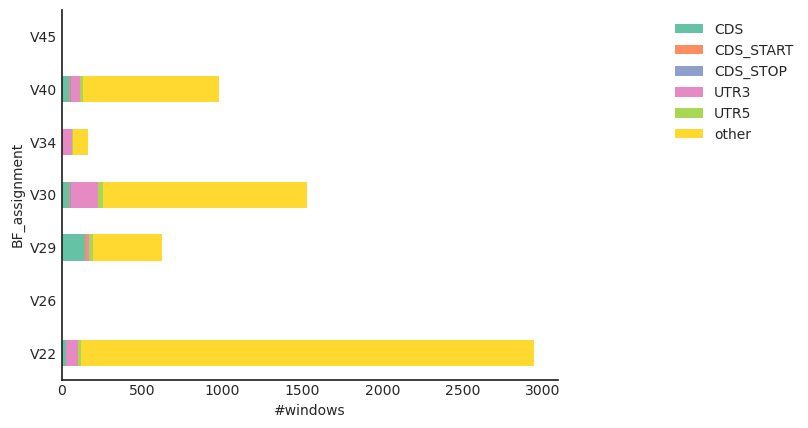

In [25]:
cnts = df.loc[df['BF_assignment'].isin(annot.loc[annot['RBP'].str.contains('RBFOX2')].index)].groupby(
    by = 'BF_assignment')['feature_type_top'].value_counts().unstack().fillna(0)
#cnts.index = [annot.loc[clus, 'RBP'] for clus in cnts.index]
other_cols = cnts.columns[~((cnts.columns.str.contains('UTR'))|(cnts.columns.str.contains('CDS')))]
cnts['other']=cnts.loc[:,other_cols].sum(axis = 1)
cnts.drop(other_cols, axis = 1, inplace = True)

cnts.plot.barh(stacked = True)
plt.legend(bbox_to_anchor = (1.5, 1))
plt.xlabel('#windows')
sns.despine()

In [15]:
# pum_motif = pd.read_csv('/home/hsher/scratch/k562_window_pum2.txt', sep = '\t')
# pum_motif = pum_motif.loc[pum_motif['Motif Name']=='1-NTGTAHATA']

# pum_motif['windowstrand']=pum_motif['PositionID'].map(df['strand'])
# pum_motif.dropna(inplace = True)
# pum_motif = pum_motif.loc[pum_motif['Strand']==pum_motif['windowstrand']]
# df['contain_motif']=df.index.isin(pum_motif['PositionID'])

# Specific examples

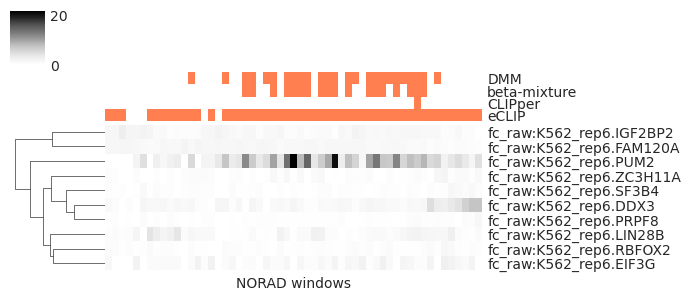

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
gene = 'NORAD'
rbp = 'PUM2'
beta = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/beta-mixture_CC/{out_stem}.{rbp}.enriched_windows.tsv', sep = '\t', index_col = 0)['name']
clipper = ground_truth.loc[ground_truth[rbp]].index
eclip = ground_truth_skipper.loc[ground_truth_skipper[rbp]].index

df['beta-mixture']=df['name'].isin(beta)
df['CLIPper']=df['name'].isin(clipper)
df['eCLIP']=df['name'].isin(eclip)
df['DMM']=df[f'{out_stem}.{rbp}']

col_annot = df.loc[df['gene_name']==gene, ['DMM', 'beta-mixture', 'CLIPper', 'eCLIP']].applymap(lambda x: 'coral' if x==True else 'white')
# https://pubmed.ncbi.nlm.nih.gov/35971448/ NORAD recruit LIN28B to bind TGFb1
cols=[c for c in df.columns if c.startswith('fc_raw')]
g=sns.clustermap(df.loc[df['gene_name']==gene][cols].T, 
               cmap = 'Greys', col_cluster = False, metric = 'correlation', figsize=(7,3),
              col_colors = col_annot, xticklabels = 0, yticklabels = 1, colors_ratio=(0.1,0.05))
ax = g.ax_heatmap.set_xlabel(f'{gene} windows')
plt.savefig(figdir/'PUM2_NORAD.pdf')

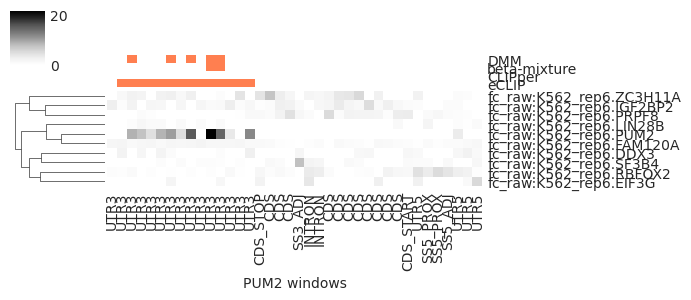

In [27]:

gene = 'PUM2'
rbp = 'PUM2'
beta = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/beta-mixture_CC/{out_stem}.{rbp}.enriched_windows.tsv', sep = '\t', index_col = 0)['name']
clipper = ground_truth.loc[ground_truth[rbp]].index
eclip = ground_truth_skipper.loc[ground_truth_skipper[rbp]].index

df['beta-mixture']=df['name'].isin(beta)
df['CLIPper']=df['name'].isin(clipper)
df['eCLIP']=df['name'].isin(eclip)
df['DMM']=df[f'{out_stem}.{rbp}']

col_annot = df.loc[df['gene_name']==gene, ['DMM', 'beta-mixture', 'CLIPper', 'eCLIP']].applymap(lambda x: 'coral' if x==True else 'white')
# https://pubmed.ncbi.nlm.nih.gov/35971448/ NORAD recruit LIN28B to bind TGFb1
cols=[c for c in df.columns if c.startswith('fc_raw')]
g=sns.clustermap(df.loc[df['gene_name']==gene][cols].T, 
               cmap = 'Greys', col_cluster = False, metric = 'correlation', figsize=(7,3),
              col_colors = col_annot, xticklabels = df.loc[df['gene_name']==gene]['feature_type_top'], yticklabels = 1, colors_ratio=(0.1,0.05))
ax = g.ax_heatmap.set_xlabel(f'{gene} windows')
plt.savefig(figdir/f'{rbp}_{gene}.pdf')

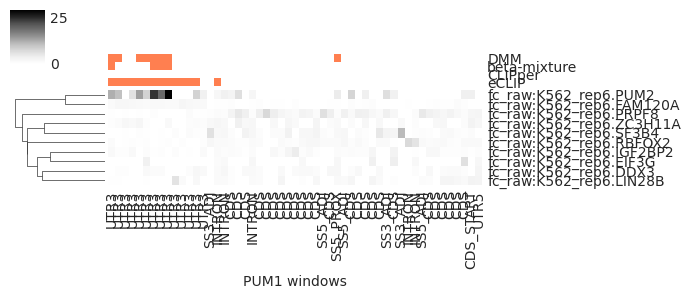

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
gene = 'PUM1' # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6444939/
beta = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/beta-mixture_CC/{out_stem}.{rbp}.enriched_windows.tsv', sep = '\t', index_col = 0)['name']
clipper = ground_truth.loc[ground_truth[rbp]].index
eclip = ground_truth_skipper.loc[ground_truth_skipper[rbp]].index

df['beta-mixture']=df['name'].isin(beta)
df['CLIPper']=df['name'].isin(clipper)
df['eCLIP']=df['name'].isin(eclip)
df['DMM']=df[f'{out_stem}.{rbp}']

col_annot = df.loc[df['gene_name']==gene, ['DMM', 'beta-mixture', 'CLIPper', 'eCLIP']].applymap(lambda x: 'coral' if x==True else 'white')
# https://pubmed.ncbi.nlm.nih.gov/35971448/ NORAD recruit LIN28B to bind TGFb1
cols=[c for c in df.columns if c.startswith('fc_raw')]
g=sns.clustermap(df.loc[df['gene_name']==gene][cols].T, 
               cmap = 'Greys', col_cluster = False, metric = 'correlation', figsize=(7,3),
              col_colors = col_annot, xticklabels = df.loc[df['gene_name']==gene]['feature_type_top'], yticklabels = 1, colors_ratio=(0.1,0.05))
ax = g.ax_heatmap.set_xlabel(f'{gene} windows')
plt.savefig(figdir/f'{rbp}_{gene}.pdf')

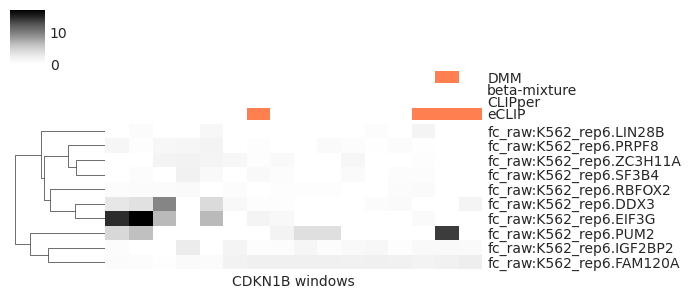

In [19]:
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6444939/
gene = 'CDKN1B' # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6444939/
rbp = 'PUM2'
beta = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/beta-mixture_CC/{out_stem}.{rbp}.enriched_windows.tsv', sep = '\t', index_col = 0)['name']
clipper = ground_truth.loc[ground_truth[rbp]].index
eclip = ground_truth_skipper.loc[ground_truth_skipper[rbp]].index

df['beta-mixture']=df['name'].isin(beta)
df['CLIPper']=df['name'].isin(clipper)
df['eCLIP']=df['name'].isin(eclip)
df['DMM']=df[f'{out_stem}.{rbp}']

col_annot = df.loc[df['gene_name']==gene, ['DMM', 'beta-mixture', 'CLIPper', 'eCLIP']].applymap(lambda x: 'coral' if x==True else 'white')
# https://pubmed.ncbi.nlm.nih.gov/35971448/ NORAD recruit LIN28B to bind TGFb1
cols=[c for c in df.columns if c.startswith('fc_raw')]
g=sns.clustermap(df.loc[df['gene_name']==gene][cols].T, 
               cmap = 'Greys', col_cluster = False, metric = 'correlation', figsize=(7,3),
              col_colors = col_annot, xticklabels = 0, yticklabels = 1, colors_ratio=(0.1,0.05))
ax = g.ax_heatmap.set_xlabel(f'{gene} windows')
plt.savefig(figdir/f'{rbp}_{gene}.pdf')

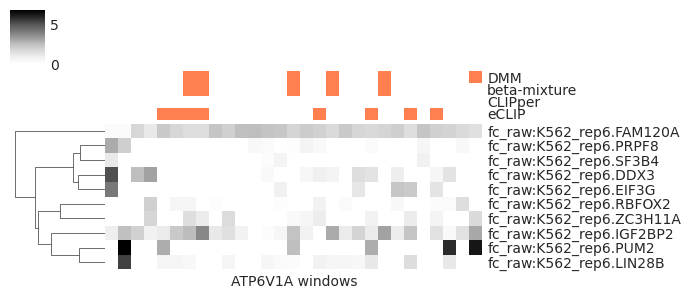

In [20]:
gene = 'ATP6V1A' # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6444939/
rbp = 'IGF2BP2'
beta = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/beta-mixture_CC/{out_stem}.{rbp}.enriched_windows.tsv', sep = '\t', index_col = 0)['name']
clipper = ground_truth.loc[ground_truth[rbp]].index
eclip = ground_truth_skipper.loc[ground_truth_skipper[rbp]].index

df['beta-mixture']=df['name'].isin(beta)
df['CLIPper']=df['name'].isin(clipper)
df['eCLIP']=df['name'].isin(eclip)
df['DMM']=df[f'{out_stem}.{rbp}']

col_annot = df.loc[df['gene_name']==gene, ['DMM', 'beta-mixture', 'CLIPper', 'eCLIP']].applymap(lambda x: 'coral' if x==True else 'white')
# https://pubmed.ncbi.nlm.nih.gov/35971448/ NORAD recruit LIN28B to bind TGFb1
cols=[c for c in df.columns if c.startswith('fc_raw')]
g=sns.clustermap(df.loc[df['gene_name']==gene][cols].T, 
               cmap = 'Greys', col_cluster = False, metric = 'correlation', figsize=(7,3),
              col_colors = col_annot, xticklabels = 0, yticklabels = 1, colors_ratio=(0.1,0.05))
ax = g.ax_heatmap.set_xlabel(f'{gene} windows')
plt.savefig(figdir/f'{rbp}_{gene}.pdf')

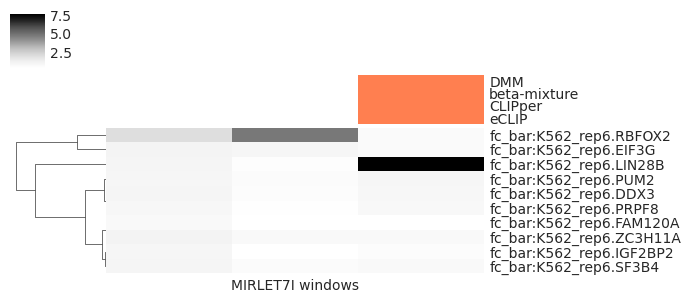

In [21]:
gene = 'MIRLET7I'  
rbp = 'LIN28B'
beta = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/beta-mixture_CC/{out_stem}.{rbp}.enriched_windows.tsv', sep = '\t', index_col = 0)['name']
clipper = ground_truth.loc[ground_truth[rbp]].index
eclip = ground_truth_skipper.loc[ground_truth_skipper[rbp]].index

df['beta-mixture']=df['name'].isin(beta)
df['CLIPper']=df['name'].isin(clipper)
df['eCLIP']=df['name'].isin(eclip)
df['DMM']=df[f'{out_stem}.{rbp}']

col_annot = df.loc[df['gene_name']==gene, ['DMM', 'beta-mixture', 'CLIPper', 'eCLIP']].applymap(lambda x: 'coral' if x==True else 'white')
# https://pubmed.ncbi.nlm.nih.gov/35971448/ NORAD recruit LIN28B to bind TGFb1
cols=[c for c in df.columns if c.startswith('fc_bar')]
g=sns.clustermap(df.loc[df['gene_name']==gene][cols].T, 
               cmap = 'Greys', col_cluster = False, metric = 'correlation', figsize=(7,3),
              col_colors = col_annot, xticklabels = 0, yticklabels = 1, colors_ratio=(0.1,0.05))
ax = g.ax_heatmap.set_xlabel(f'{gene} windows')

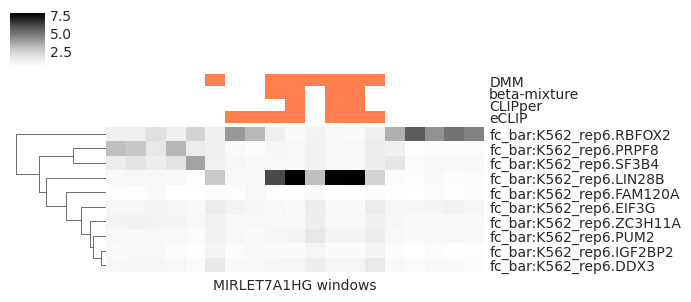

In [22]:

gene = 'MIRLET7A1HG'  
rbp = 'LIN28B'
beta = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/beta-mixture_CC/{out_stem}.{rbp}.enriched_windows.tsv', sep = '\t', index_col = 0)['name']
clipper = ground_truth.loc[ground_truth[rbp]].index
eclip = ground_truth_skipper.loc[ground_truth_skipper[rbp]].index

df['beta-mixture']=df['name'].isin(beta)
df['CLIPper']=df['name'].isin(clipper)
df['eCLIP']=df['name'].isin(eclip)
df['DMM']=df[f'{out_stem}.{rbp}']

col_annot = df.loc[df['gene_name']==gene, ['DMM', 'beta-mixture', 'CLIPper', 'eCLIP']].applymap(lambda x: 'coral' if x==True else 'white')
# https://pubmed.ncbi.nlm.nih.gov/35971448/ NORAD recruit LIN28B to bind TGFb1
cols=[c for c in df.columns if c.startswith('fc_bar')]
g=sns.clustermap(df.loc[df['gene_name']==gene][cols].T, 
               cmap = 'Greys', col_cluster = False, metric = 'correlation', figsize=(7,3),
              col_colors = col_annot, xticklabels = 0, yticklabels = 1, colors_ratio=(0.1,0.05))
ax = g.ax_heatmap.set_xlabel(f'{gene} windows')

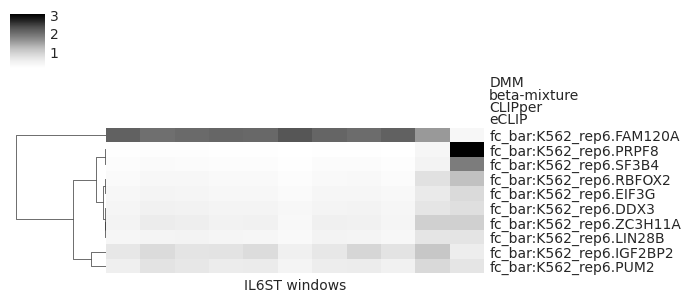

In [23]:
gene = 'IL6ST' # https://www.frontiersin.org/articles/10.3389/fimmu.2022.1002823/full
rbp = 'ZC3H11A'
beta = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/beta-mixture_CC/{out_stem}.{rbp}.enriched_windows.tsv', sep = '\t', index_col = 0)['name']
clipper = ground_truth.loc[ground_truth[rbp]].index
eclip = ground_truth_skipper.loc[ground_truth_skipper[rbp]].index

df['beta-mixture']=df['name'].isin(beta)
df['CLIPper']=df['name'].isin(clipper)
df['eCLIP']=df['name'].isin(eclip)
df['DMM']=df[f'{out_stem}.{rbp}']

col_annot = df.loc[df['gene_name']==gene, ['DMM', 'beta-mixture', 'CLIPper', 'eCLIP']].applymap(lambda x: 'coral' if x==True else 'white')
# https://pubmed.ncbi.nlm.nih.gov/35971448/ NORAD recruit LIN28B to bind TGFb1
cols=[c for c in df.columns if c.startswith('fc_bar')]
g=sns.clustermap(df.loc[df['gene_name']==gene][cols].T, 
               cmap = 'Greys', col_cluster = False, metric = 'correlation', figsize=(7,3),
              col_colors = col_annot, xticklabels = 0, yticklabels = 1, colors_ratio=(0.1,0.05))
ax = g.ax_heatmap.set_xlabel(f'{gene} windows')

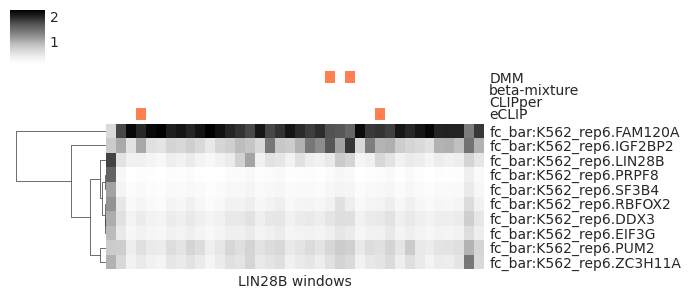

In [24]:
gene = 'LIN28B' # https://www.frontiersin.org/articles/10.3389/fimmu.2022.1002823/full
rbp = 'IGF2BP2'
# https://www.nature.com/articles/s41467-019-11910-6
# Previous CLIP-seq studies with IGF2BP2 had revealed binding sites on the 3′UTR of LIN28B mRNA in HEK293T cells2
# https://www.nature.com/articles/s41467-019-11910-6
beta = pd.read_csv(f'/home/hsher/scratch/ABC_2rep/beta-mixture_CC/{out_stem}.{rbp}.enriched_windows.tsv', sep = '\t', index_col = 0)['name']
clipper = ground_truth.loc[ground_truth[rbp]].index
eclip = ground_truth_skipper.loc[ground_truth_skipper[rbp]].index

df['beta-mixture']=df['name'].isin(beta)
df['CLIPper']=df['name'].isin(clipper)
df['eCLIP']=df['name'].isin(eclip)
df['DMM']=df[f'{out_stem}.{rbp}']

col_annot = df.loc[df['gene_name']==gene, ['DMM', 'beta-mixture', 'CLIPper', 'eCLIP']].applymap(lambda x: 'coral' if x==True else 'white')
# https://pubmed.ncbi.nlm.nih.gov/35971448/ NORAD recruit LIN28B to bind TGFb1
cols=[c for c in df.columns if c.startswith('fc_bar')]
g=sns.clustermap(df.loc[df['gene_name']==gene][cols].T, 
               cmap = 'Greys', col_cluster = False, metric = 'correlation', figsize=(7,3),
              col_colors = col_annot, xticklabels = 0, yticklabels = 1, colors_ratio=(0.1,0.05))
ax = g.ax_heatmap.set_xlabel(f'{gene} windows')

# ML: Region and Feature preferences

In [25]:
def make_binary(df, col):
    binary_df = pd.DataFrame(False, index = df.index, columns = df[col[:-1]+'_top'].unique())
    for index, row in df.iterrows():
        binary_df.loc[index, row[col].split(':')] = True
    
    return binary_df.fillna(False)
    



In [26]:
feature_binary = make_binary(df, 'feature_types')
gene_binary = make_binary(df, 'transcript_types')

In [27]:
# https://cancerci.biomedcentral.com/articles/10.1186/s12935-021-01799-x
'''
In addition, high mobility group AT-hook 2 (HMGA2), a DNA-binding protein, is often reactivated in various cancers. 
Expression of HMGA2 enhances metastasis and is associated with poor prognosis of cancers [82,83,84]. 
Interestingly, HMGA2 regulates IGF2BP2, a noble rhabdomyosarcoma (ERMS) protein key in survival and growth of cells. 
IGF2BP2 binds NRAS mRNA, regulating the expression of NRAS protein [85]. 
RPSAP52, an antisense transcribed pseudogene of HMGA2, promotes proliferation of sarcoma and self-renewal pathways by cross-linking with IGF2BP2 [86]. 
Except for HMGA2, IGF2BP2 markedly promotes functions of IGF and proliferation of cancer cells by binding and stabilizing HMGA1 [8].
'''

'\nIn addition, high mobility group AT-hook 2 (HMGA2), a DNA-binding protein, is often reactivated in various cancers. \nExpression of HMGA2 enhances metastasis and is associated with poor prognosis of cancers [82,83,84]. \nInterestingly, HMGA2 regulates IGF2BP2, a noble rhabdomyosarcoma (ERMS) protein key in survival and growth of cells. \nIGF2BP2 binds NRAS mRNA, regulating the expression of NRAS protein [85]. \nRPSAP52, an antisense transcribed pseudogene of HMGA2, promotes proliferation of sarcoma and self-renewal pathways by cross-linking with IGF2BP2 [86]. \nExcept for HMGA2, IGF2BP2 markedly promotes functions of IGF and proliferation of cancer cells by binding and stabilizing HMGA1 [8].\n'

# gene type classifier

In [28]:
mask = df[['DMM']].merge(mask, how = 'left', left_index = True, right_index = True).fillna(True)
mask.drop('DMM', axis =1, inplace = True)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

classification_score = []
coef_df = []
for col in raw_data.columns:
    #idx = df.index[df[f'logLR:{col}'].abs().ge(2)]
    X = gene_binary
    y = df.loc[X.index, f'logLR:{col}'].ge(0)*mask.loc[X.index, col] # unprocessed from segmental duplication
     
    
    clf = LogisticRegression(solver = 'newton-cg', class_weight = 'balanced').fit(X, y)
    

    coef = pd.Series(clf.coef_[0], index = X.columns).sort_values()
    coef.name = col
    coef_df.append(coef)
    f1 = f1_score(y, clf.predict(X))
    classification_score.append([clf.score(X, y), f1])

coef_df = pd.concat(coef_df, axis =1)
classification_score=pd.DataFrame(classification_score, index = raw_data.columns, 
                                  columns = ['Accuracy', 'F1'])

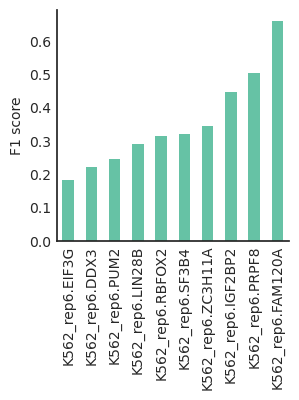

In [30]:
classification_score['F1'].sort_values().plot.bar(figsize = (3,3))
plt.ylabel('F1 score')
sns.despine()
plt.savefig(figdir/f'F1_Ridge_transcript_type.pdf')

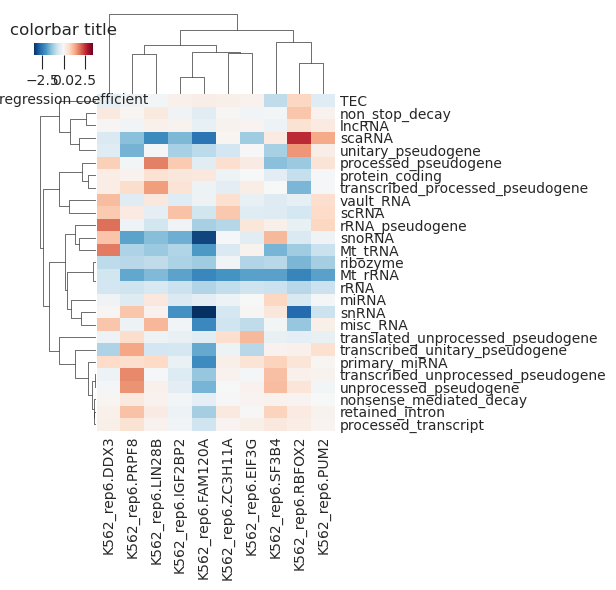

In [31]:
abs_value = max(coef_df.max().max(), -coef_df.min().min())
g=sns.clustermap(coef_df, cmap = 'RdBu_r', vmax = abs_value, vmin = -abs_value, figsize = (6,6), metric = 'cosine',
              yticklabels = 1,xticklabels = 1, cbar_kws = {'label':'L2 regression coefficient', 
                                                           'orientation':'horizontal',
                                                          })
x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.9, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('colorbar title')
g.ax_cbar.tick_params(axis='x', length=10)
plt.savefig(figdir/f'Ridge_transcript_type.pdf')

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

classification_score = []
coef_df = []
for col in raw_data.columns:
    X = feature_binary.dropna(axis = 1)
    y = df.loc[X.index, col] # unprocessed from segmental duplication
     
    
    clf = LogisticRegression(solver = 'newton-cg', class_weight = 'balanced').fit(X, y)
    

    coef = pd.Series(clf.coef_[0], index = X.columns).sort_values()
    coef.name = col
    coef_df.append(coef)
    f1 = f1_score(y, clf.predict(X))
    classification_score.append([clf.score(X, y), f1])

coef_df = pd.concat(coef_df, axis =1)
classification_score=pd.DataFrame(classification_score, index = raw_data.columns, 
                                  columns = ['Accuracy', 'F1'])

coef_df.columns = [c.split('.')[1] for c in coef_df.columns]

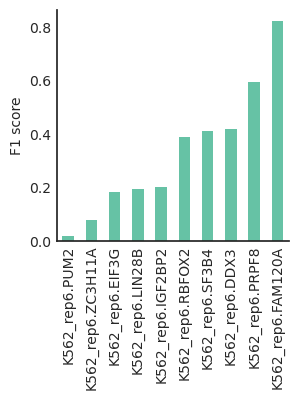

In [33]:
classification_score['F1'].sort_values().plot.bar(figsize = (3,3))
plt.ylabel('F1 score')
sns.despine()
plt.savefig(figdir/f'F1_Ridge_region_type.pdf')

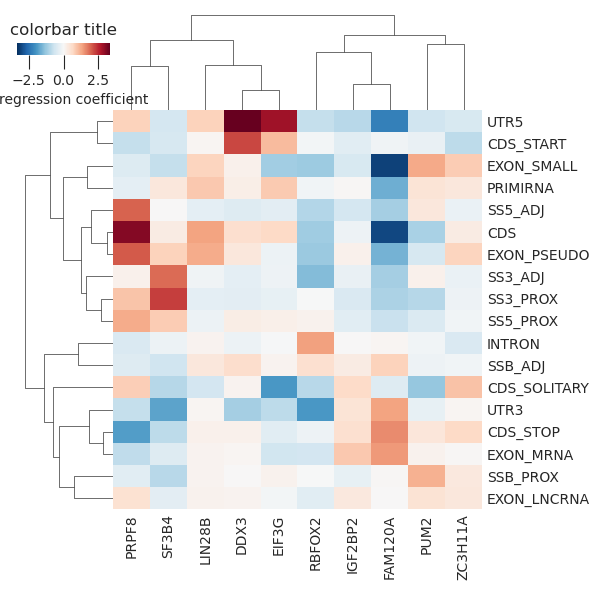

In [34]:
abs_value = max(coef_df.max().max(), -coef_df.min().min())
g=sns.clustermap(coef_df, cmap = 'RdBu_r', vmax = abs_value, vmin = -abs_value, figsize = (6,6), metric = 'cosine',
              yticklabels = 1,xticklabels = 1, cbar_kws = {'label':'L2 regression coefficient', 
                                                           'orientation':'horizontal',
                                                          })
x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.9, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('colorbar title')
g.ax_cbar.tick_params(axis='x', length=10)
plt.savefig(figdir/f'Ridge_region_type.pdf')

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly_feat = poly.fit_transform(pd.concat([gene_binary, feature_binary],axis = 1),
                              )

In [36]:
poly_feat = []
 
for i in gene_binary.columns:
    for j in feature_binary.columns:
        value = gene_binary[i]*feature_binary[j]
        value.name = f'{i}:{j}'
        poly_feat.append(value)
poly_feat = pd.concat(poly_feat,axis = 1)

<Axes: >

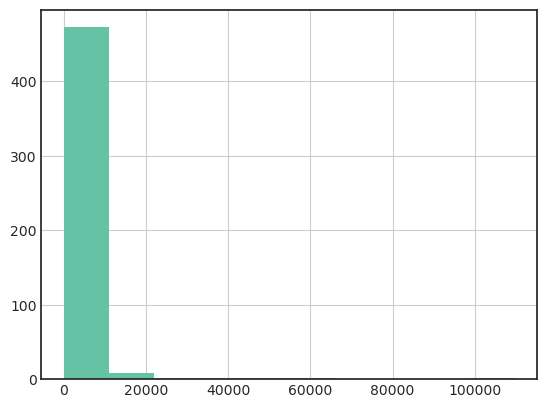

In [37]:
poly_feat.sum().hist()

In [38]:
poly_feat = poly_feat.loc[:, poly_feat.sum()>10]

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

classification_score = []
coef_df = []
for col in raw_data.columns:
    #idx = df.index[df[f'logLR:{col}'].abs().ge(2)]
    X = poly_feat
    y = df.loc[X.index, col] # unprocessed from segmental duplication
     
    
    clf = LogisticRegression(solver = 'newton-cg', class_weight = 'balanced').fit(X, y)
    

    coef = pd.Series(clf.coef_[0], index = X.columns).sort_values()
    coef.name = col
    coef_df.append(coef)
    f1 = f1_score(y, clf.predict(X))
    classification_score.append([clf.score(X, y), f1])

coef_df = pd.concat(coef_df, axis =1)
classification_score=pd.DataFrame(classification_score, index = raw_data.columns, 
                                  columns = ['Accuracy', 'F1'])

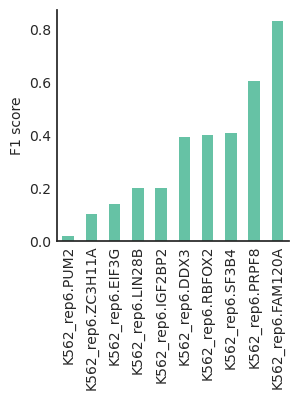

In [40]:
classification_score['F1'].sort_values().plot.bar(figsize = (3,3))
plt.ylabel('F1 score')
sns.despine()
plt.savefig(figdir/f'F1_Ridge_both_type.pdf')

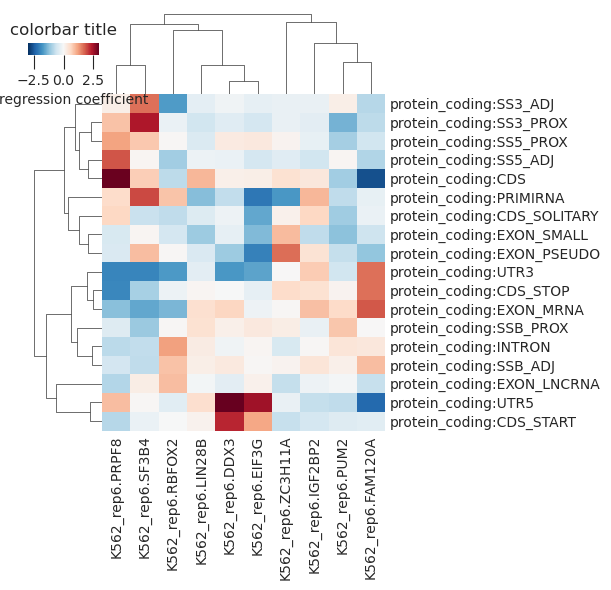

<Figure size 640x480 with 0 Axes>

In [41]:
sub = coef_df.loc[coef_df.index.str.contains('protein_coding')]
abs_value = max(sub.max().max(), -sub.min().min())
g=sns.clustermap(sub, cmap = 'RdBu_r', vmax = abs_value, vmin = -abs_value, figsize = (6,6), metric = 'cosine',
              yticklabels = 1,xticklabels = 1, cbar_kws = {'label':'L2 regression coefficient', 
                                                           'orientation':'horizontal',
                                                          })
x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.9, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('colorbar title')
g.ax_cbar.tick_params(axis='x', length=10)
plt.show()
plt.savefig(figdir/f'Ridge_both_type_protein_coding.pdf')

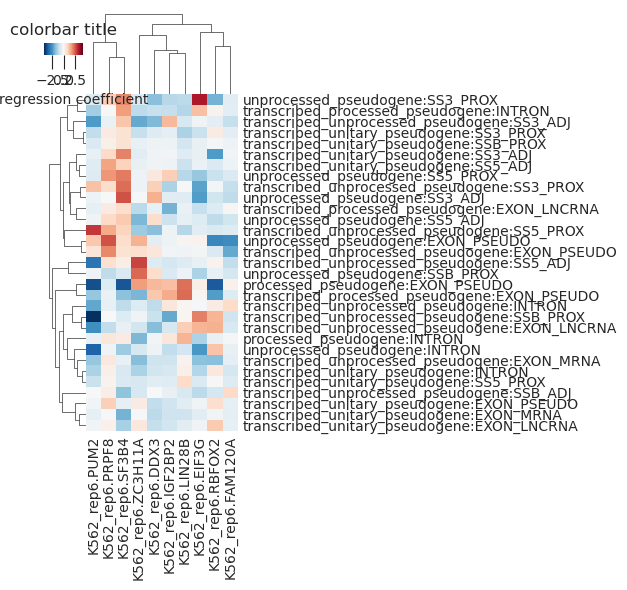

<Figure size 640x480 with 0 Axes>

In [42]:
sub = coef_df.loc[coef_df.index.str.contains('pseudogene')]
abs_value = max(sub.max().max(), -sub.min().min())
g=sns.clustermap(sub, cmap = 'RdBu_r', vmax = abs_value, vmin = -abs_value, figsize = (6,6), metric = 'cosine',
              yticklabels = 1,xticklabels = 1, cbar_kws = {'label':'L2 regression coefficient', 
                                                           'orientation':'horizontal',
                                                          })
x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.9, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('colorbar title')
g.ax_cbar.tick_params(axis='x', length=10)
plt.show()
plt.savefig(figdir/f'Ridge_both_type_pseudogene.pdf')

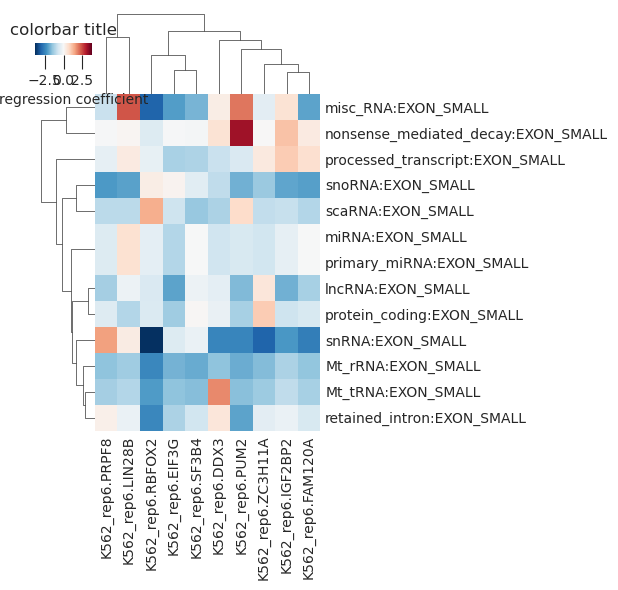

<Figure size 640x480 with 0 Axes>

In [43]:
sub = coef_df.loc[coef_df.index.str.contains('EXON_SMALL')]
abs_value = max(sub.max().max(), -sub.min().min())
g=sns.clustermap(sub, cmap = 'RdBu_r', vmax = abs_value, vmin = -abs_value, figsize = (6,6), metric = 'cosine',
              yticklabels = 1,xticklabels = 1, cbar_kws = {'label':'L2 regression coefficient', 
                                                           'orientation':'horizontal',
                                                          })
x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.9, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('colorbar title')
g.ax_cbar.tick_params(axis='x', length=10)
plt.show()
plt.savefig(figdir/f'Ridge_both_type_smallRNA.pdf')

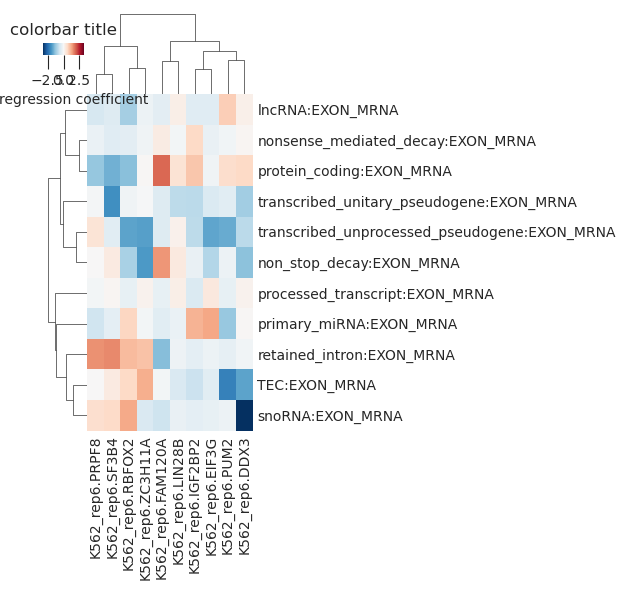

<Figure size 640x480 with 0 Axes>

In [44]:
sub = coef_df.loc[coef_df.index.str.contains('EXON_MRNA')]
abs_value = max(sub.max().max(), -sub.min().min())
g=sns.clustermap(sub, cmap = 'RdBu_r', vmax = abs_value, vmin = -abs_value, figsize = (6,6), metric = 'cosine',
              yticklabels = 1,xticklabels = 1, cbar_kws = {'label':'L2 regression coefficient', 
                                                           'orientation':'horizontal',
                                                          })
x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.9, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('colorbar title')
g.ax_cbar.tick_params(axis='x', length=10)
plt.show()
plt.savefig(figdir/f'Ridge_transcript_type.pdf')

In [45]:
ols_coef = []
ols_pval = []
for col in raw_data.columns:
    X = feature_binary.dropna(axis = 1).astype(float)
    y = df.loc[X.index, f'logLR:{col}']
    X = sm.add_constant(X)
    model = sm.OLS(y,X)
    results = model.fit()
    pval = results.pvalues
    coef = results.params
    
    pval.name = col
    coef.name = col
    ols_coef.append(coef)
    ols_pval.append(pval)
ols_coef = pd.concat(ols_coef, axis = 1)
ols_pval = pd.concat(ols_pval, axis = 1)

_, fdr = fdrcorrection(ols_pval.values.flatten())
ols_fdr=pd.DataFrame(fdr.reshape(ols_pval.shape), index=ols_pval.index, columns = ols_pval.columns)

max_value = max(ols_coef.max().max(),-ols_coef.min().min())/3
g=sns.clustermap(ols_coef, cmap = 'RdBu_r', vmax = max_value, vmin = -max_value, figsize = (6,6), metric = 'cosine',
              yticklabels = 1,xticklabels = 1, cbar_kws = {'label':'Ridge regression coefficient', 
                                                           'orientation':'horizontal',
                                                          }, mask = ols_fdr.le(0.2)
                )

NameError: name 'sm' is not defined